In [1]:
%matplotlib inline

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


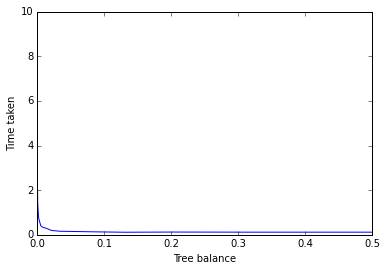

In [3]:
import timeit
import numpy as np
import matplotlib.pyplot as plt

eps = 1e-16
N = 10000
# This variable defines how well balanced the recursive tree will be.
locations = [0.0, 0.5, 1.0 - eps]


def median(x1, x2, x3):
    for a in range(7):
        if x1 <= x2 <= x3:
            return x2
        # Every loop I'm shufflin
        (x1, x2, x3) = (x2, x1, x3)
        if a % 2:
            (x1, x2, x3) = (x3, x1, x2)


def qsort(lst):
    indices = [(0, len(lst))]

    while indices:
        (frm, to) = indices.pop()
        if frm == to:
            continue

        # Find the partition:
        N = to - frm
        inds = [frm + int(N * n) for n in locations]
        values = [lst[ind] for ind in inds]
        partition = median(*values)

        # Split into lists:
        lower = [a for a in lst[frm:to] if a < partition]
        upper = [a for a in lst[frm:to] if a > partition]
        counts = sum([1 for a in lst[frm:to] if a == partition])

        ind1 = frm + len(lower)
        ind2 = ind1 + counts

        # Push back into correct place:
        lst[frm:ind1] = lower
        lst[ind1:ind2] = [partition] * counts
        lst[ind2:to] = upper

        # Enqueue other locations
        indices.append((frm, ind1))
        indices.append((ind2, to))
    return lst


def degenerate_quicksort():
    qsort(range(N))


n = np.linspace(0, 1 - eps, 1000)
n = np.logspace(np.log10(0.5), -np.log10(N), 20)
t = np.zeros(n.shape)
for a in range(n.size):
    print(a)
    locations[1] = n[a]
    t[a] = timeit.timeit(degenerate_quicksort, number=1)

plt.plot(n, t)
plt.ylabel('Time taken')
plt.xlabel('Tree balance')
plt.show()